In [1]:
import csv
import pickle
import numpy as np
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
from boonnano import NanoHandle

ModuleNotFoundError: No module named 'boonnano'

In [2]:
with open('../data/processed/stats.csv', 'rb') as f:
    data = pickle.load(f)

In [3]:
players = data['usernames']
skills = [feature[:-len("_level")] for feature in data['features'][4::3]]

levels = data['stats'][:, 4::3]
levels[np.where(levels == -1)] = 1

In [4]:
nano = NanoHandle(timeout=None)

using nano 'all'


0it [00:00, ?it/s]

pv = 0.2, num_clusters = 272
pv = 0.19, num_clusters = 296
pv = 0.18, num_clusters = 308
pv = 0.17, num_clusters = 418
pv = 0.16, num_clusters = 586
pv = 0.15, num_clusters = 828
pv = 0.14, num_clusters = 1207
pv = 0.13, num_clusters = 1742
pv = 0.12, num_clusters = 2576
pv = 0.11, num_clusters = 3847
pv = 0.1, num_clusters = 5777


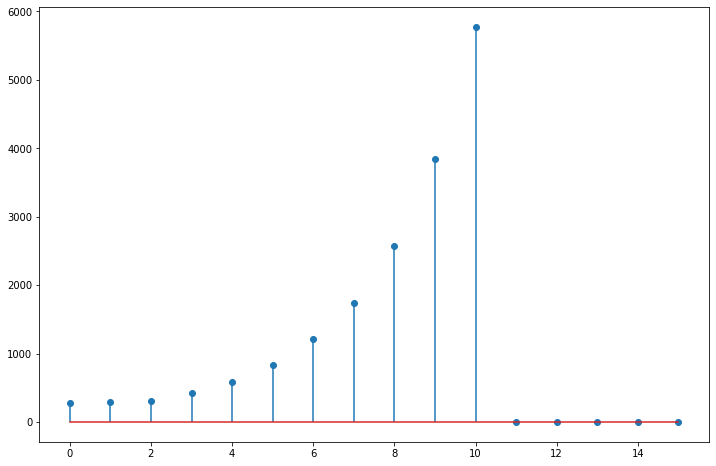

using nano 'cb'


0it [00:00, ?it/s]

pv = 0.2, num_clusters = 57
pv = 0.19, num_clusters = 58
pv = 0.18, num_clusters = 59
pv = 0.17, num_clusters = 77
pv = 0.16, num_clusters = 89
pv = 0.15, num_clusters = 108
pv = 0.14, num_clusters = 126
pv = 0.13, num_clusters = 164
pv = 0.12, num_clusters = 190
pv = 0.11, num_clusters = 237
pv = 0.1, num_clusters = 311
pv = 0.09, num_clusters = 412
pv = 0.08, num_clusters = 549
pv = 0.07, num_clusters = 771
pv = 0.06, num_clusters = 1029
pv = 0.05, num_clusters = 1508


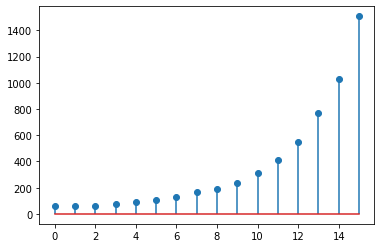

using nano 'noncb'


0it [00:00, ?it/s]

pv = 0.2, num_clusters = 311
pv = 0.19, num_clusters = 323
pv = 0.18, num_clusters = 342
pv = 0.17, num_clusters = 439
pv = 0.16, num_clusters = 617
pv = 0.15, num_clusters = 862
pv = 0.14, num_clusters = 1201
pv = 0.13, num_clusters = 1739
pv = 0.12, num_clusters = 2555
pv = 0.11, num_clusters = 3777
pv = 0.1, num_clusters = 5622


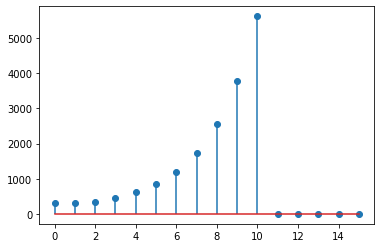

In [30]:
plt.figure(figsize=(12, 8))

num_rows = levels.shape[0]
for experiment in ['all', 'cb', 'noncb']:
    
    if experiment == 'all':
        feature_count = 23
        weight = 7*[16*23] + 16*[7*23]
        dataset = levels
    elif experiment == 'cb':
        feature_count = 7
        weight = 1
        dataset = levels[:, :7]
    elif experiment == 'noncb':
        feature_count = 16
        weight = 1
        dataset = levels[:, 7:]
        
    success, response = nano.open_nano('all')
    if not success:
        raise ValueError(response)
    print("using nano '{}'".format(experiment))
        
    subsample = np.random.choice(num_rows, size=100000, replace=False)
    autotune_data = dataset[subsample]
    
    pvs = np.linspace(0.05, 0.20, 16)
    num_clusters = np.zeros(len(pvs), dtype='int')
    for i, pv in tqdm(enumerate(pvs[::-1])):
        nano.configure_nano(feature_count=feature_count,
                            min_val=1, max_val=99,
                            weight=weight,
                            percent_variation=pv)

        cluster_ids = np.zeros(100000, dtype='int')
        for j in range(10):
            batch_start = j*10000
            batch_end = (j+1)*10000
            batch = autotune_data[batch_start:batch_end]
            
            success, response = nano.load_data(batch)
            if not success:
                raise ValueError(response)
            success, response = nano.run_nano(results='ID,RI')
            if not success:
                raise ValueError(response)
                
            cluster_ids[batch_start:batch_end] = response['ID']
        
        cluster_count = np.max(cluster_ids)
        num_clusters[i] = cluster_count
        
        print("pv = {:0.2}, num_clusters = {}".format(pv, cluster_count))
        
        if cluster_count > 5000:
            break

    plt.stem(num_clusters)
    plt.show()

using nano 'all'


0it [00:00, ?it/s]

pv = 0.13, num_clusters = 1813
pv = 0.129, num_clusters = 1890
pv = 0.128, num_clusters = 1944
pv = 0.127, num_clusters = 1997
pv = 0.126, num_clusters = 2079


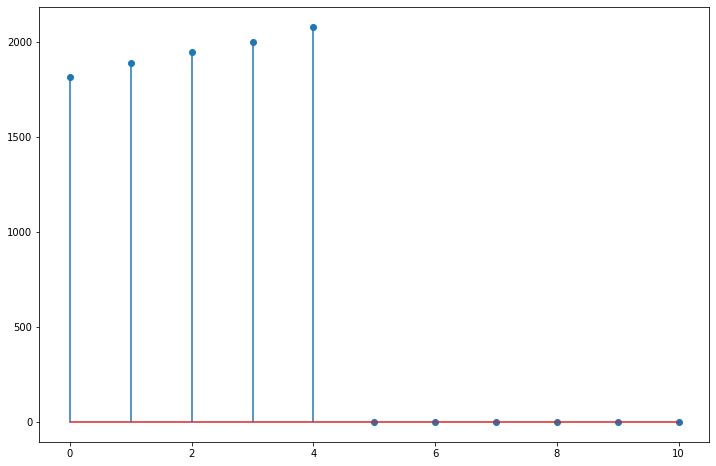

using nano 'cb'


0it [00:00, ?it/s]

pv = 0.07, num_clusters = 740
pv = 0.069, num_clusters = 752
pv = 0.068, num_clusters = 769
pv = 0.067, num_clusters = 790
pv = 0.066, num_clusters = 818
pv = 0.065, num_clusters = 845
pv = 0.064, num_clusters = 859
pv = 0.063, num_clusters = 894
pv = 0.062, num_clusters = 928
pv = 0.061, num_clusters = 955
pv = 0.06, num_clusters = 989


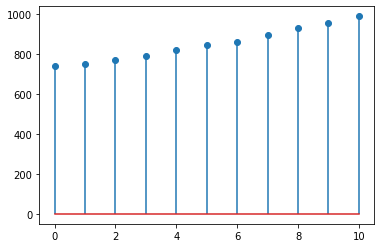

using nano 'noncb'


0it [00:00, ?it/s]

pv = 0.15, num_clusters = 847
pv = 0.149, num_clusters = 864
pv = 0.148, num_clusters = 890
pv = 0.147, num_clusters = 925
pv = 0.146, num_clusters = 962
pv = 0.145, num_clusters = 965
pv = 0.144, num_clusters = 1005


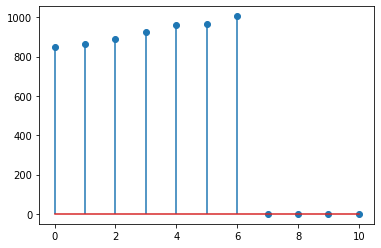

In [40]:
plt.figure(figsize=(12, 8))

num_rows = levels.shape[0]
for experiment in ['all', 'cb', 'noncb']:
    
    if experiment == 'all':
        feature_count = 23
        weight = 7*[16*23] + 16*[7*23]
        pvs = np.linspace(0.12, 0.13, 11)[::-1]
        dataset = levels
    elif experiment == 'cb':
        feature_count = 7
        weight = 1
        pvs = np.linspace(0.06, 0.07, 11)[::-1]
        dataset = levels[:, :7]
    elif experiment == 'noncb':
        feature_count = 16
        weight = 1
        pvs = np.linspace(0.14, 0.15, 11)[::-1]
        dataset = levels[:, 7:]
        
    success, response = nano.open_nano('all')
    if not success:
        raise ValueError(response)
    print("using nano '{}'".format(experiment))
        
    subsample = np.random.choice(num_rows, size=100000, replace=False)
    autotune_data = dataset[subsample]
    
    num_clusters = np.zeros(len(pvs), dtype='int')
    for i, pv in tqdm(enumerate(pvs)):
        nano.configure_nano(feature_count=feature_count,
                            min_val=1, max_val=99,
                            weight=weight,
                            percent_variation=pv)

        cluster_ids = np.zeros(100000, dtype='int')
        for j in range(10):
            batch_start = j*10000
            batch_end = (j+1)*10000
            batch = autotune_data[batch_start:batch_end]
            
            success, response = nano.load_data(batch)
            if not success:
                raise ValueError(response)
            success, response = nano.run_nano(results='ID,RI')
            if not success:
                raise ValueError(response)
                
            cluster_ids[batch_start:batch_end] = response['ID']
        
        cluster_count = np.max(cluster_ids)
        num_clusters[i] = cluster_count
        
        print("pv = {:0.3}, num_clusters = {}".format(pv, cluster_count))
        
        if experiment == 'all':
            if cluster_count > 2000:
                break
        else:
            if cluster_count > 1000:
                break

    plt.stem(num_clusters)
    plt.show()

In [41]:
params = {
    'all': {
        'pv': 0.127,
        'weight': 7*[16*23] + 16*[7*23],
        'feature_count': 23
    },
    'cb': {
        'pv': 0.060,
        'weight': 1,
        'feature_count': 7
    },
    'noncb': {
        'pv': 0.144,
        'weight': 1,
        'feature_count': 16
    }
}